# 4.2 Exercises: Scatterplots, Bubble Charts, & Density Plots - Python
Michael Hotaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimerate = pd.read_csv("crimerates-by-state-2005.csv") 
df = pd.read_csv("state_data.csv")
crimerate = pd.merge(crimerate, df, left_on="state", right_on="State")
crimerate = crimerate[~crimerate['state'].isin(['United States','District of Columbia'])]

# Scatter Plot

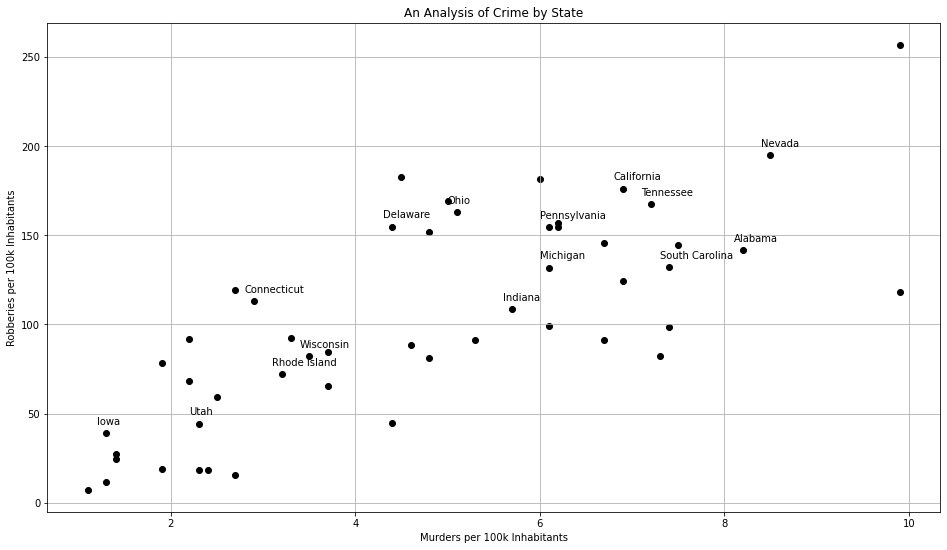

In [3]:
temp = crimerate.sample(frac=0.3)

plt.figure(figsize=(16,9))
plt.grid(True)
plt.scatter(x = crimerate['murder'], y = crimerate['robbery'], color = 'black')
for state, murder, robbery in zip(temp['state'], temp['murder'], temp['robbery']):
    plt.text(x = murder + -0.1, y = robbery+5, s = state)
plt.xlabel("Murders per 100k Inhabitants")
plt.ylabel("Robberies per 100k Inhabitants")
plt.title("An Analysis of Crime by State")
plt.show()

# Bubble Plot

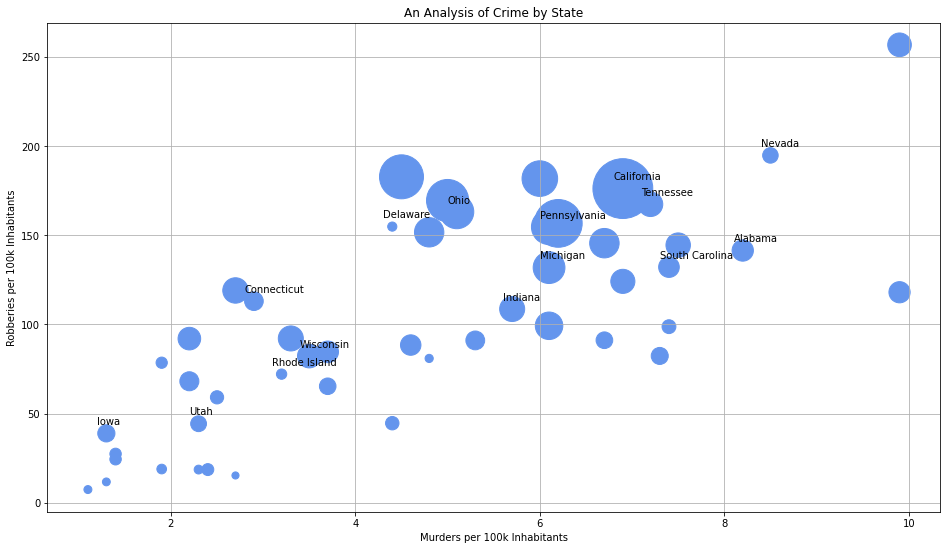

In [4]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.scatter(x = crimerate['murder'], y = crimerate['robbery'], s = crimerate['population']/10000, color = 'cornflowerblue')
for state, murder, robbery in zip(temp['state'], temp['murder'], temp['robbery']):
    plt.text(x = murder + -0.1, y = robbery+5, s = state)
plt.xlabel("Murders per 100k Inhabitants")
plt.ylabel("Robberies per 100k Inhabitants")
plt.title("An Analysis of Crime by State")
plt.show()

# Kernel Density Plot

Text(0.5, 1.0, 'An Analysis of Crime by US Region')

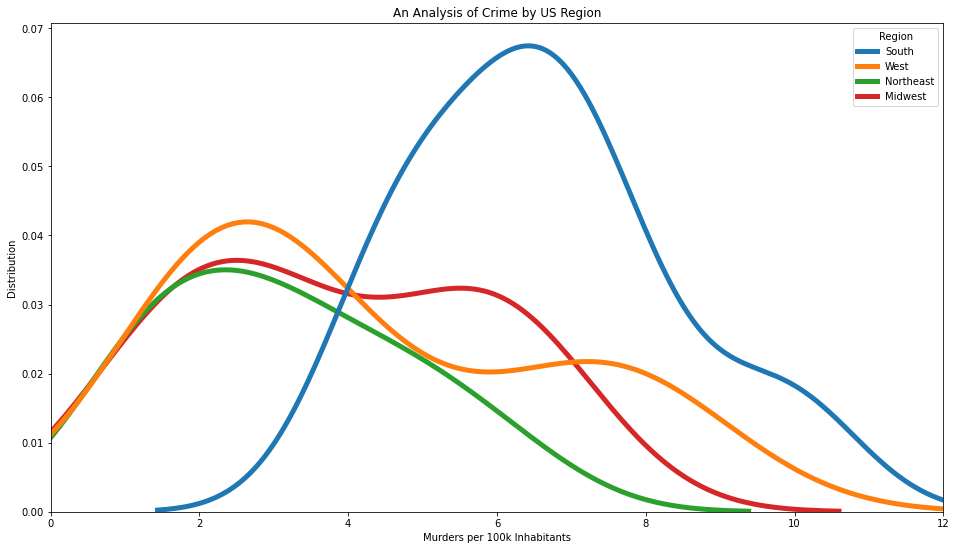

In [5]:
plt.figure(figsize=(16,9))
sns.kdeplot(x = crimerate['murder'],
            hue = crimerate['Region'], 
            linewidth = 5)
plt.xlim(0,12)
plt.xlabel("Murders per 100k Inhabitants")
plt.ylabel("Distribution")
plt.title("An Analysis of Crime by US Region")

# Generating Data for Tableau

In [6]:
from sklearn.neighbors import KernelDensity

df = pd.DataFrame()
x_d = np.linspace(0, 12, 1000)

df['Murder_Rate'] = x_d

for i in crimerate['Region'].unique():
    
    # Subset the dataframe
    x = crimerate[crimerate['Region'] == i]['murder']
    
    # Fit KDE Model
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(np.array(x).reshape(-1,1))

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(np.array(x_d).reshape(-1,1))
    df[i] = np.exp(logprob)
    
df.to_csv("kdexport.csv")